['BulletCluster/simulation_output_T.pickle', 'BulletCluster/simulation_output_alpha.pickle', 'BulletCluster/simulation_output_d_max.pickle', 'BulletCluster/simulation_output_TSM_1.pickle', 'BulletCluster/simulation_output_prob.pickle', 'BulletCluster/simulation_output_m_1.pickle', 'BulletCluster/simulation_output_v_rad_obs.pickle', 'BulletCluster/simulation_output_v_3d_obs.pickle', 'BulletCluster/simulation_output_d_3d.pickle', 'BulletCluster/simulation_output_d_proj.pickle', 'BulletCluster/simulation_output_TSM_0.pickle', 'BulletCluster/simulation_output_z_2.pickle', 'BulletCluster/simulation_output_z_1.pickle', 'BulletCluster/simulation_output_m_2.pickle', 'BulletCluster/simulation_output_v_3d_col.pickle']


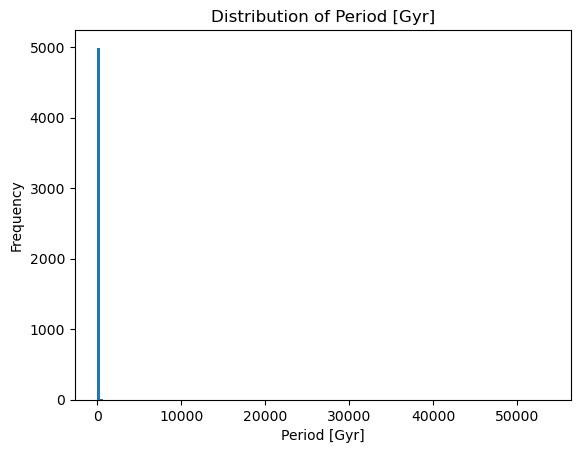

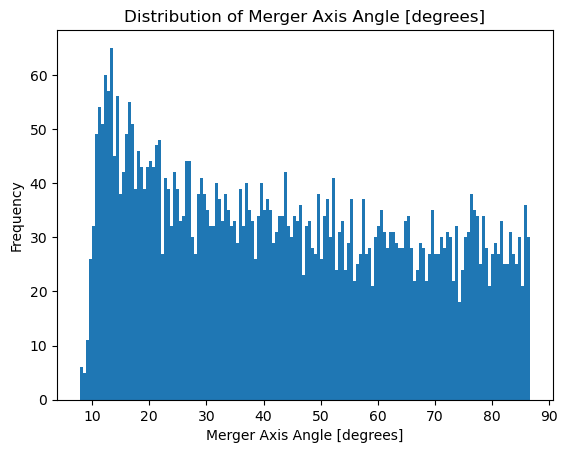

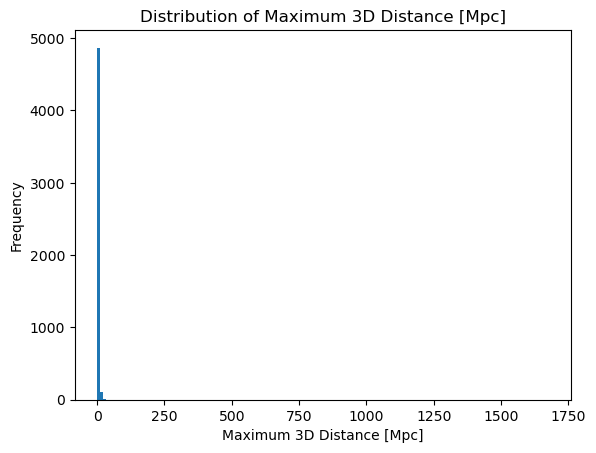

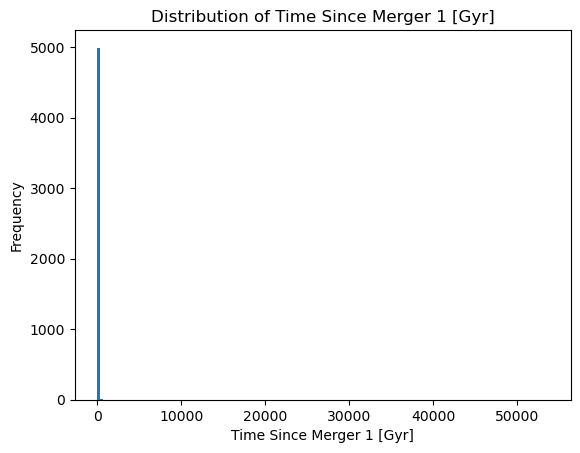

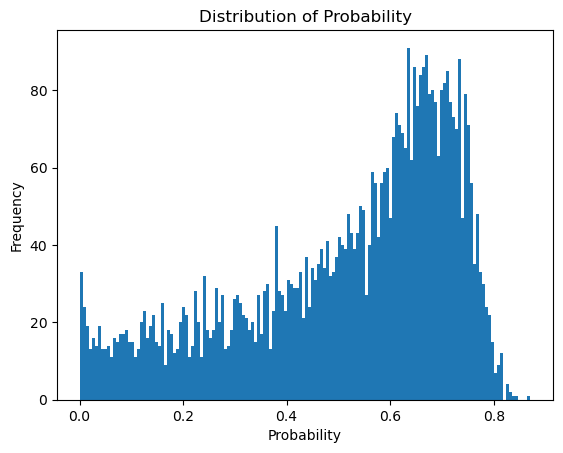

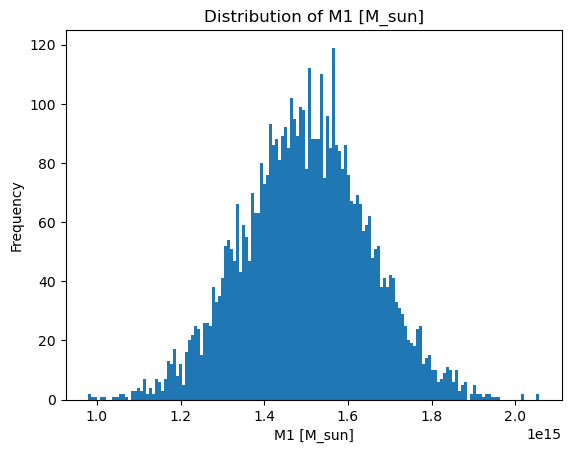

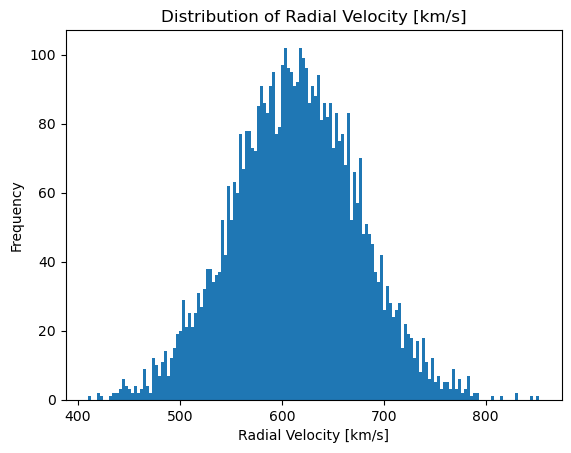

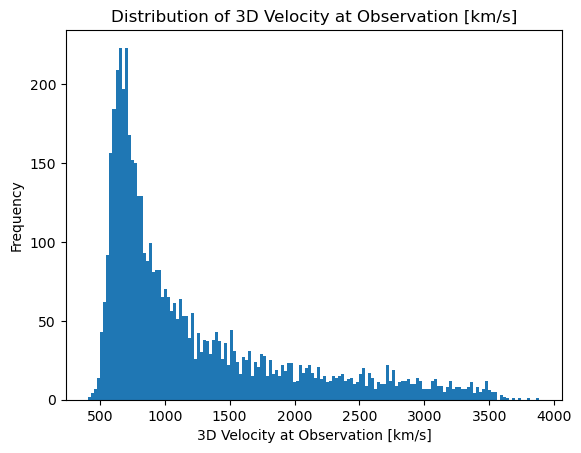

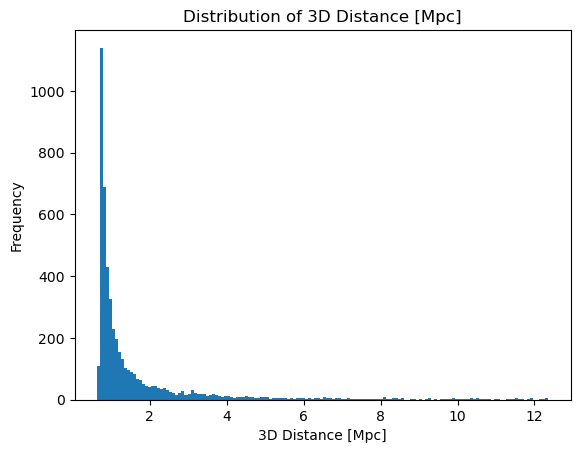

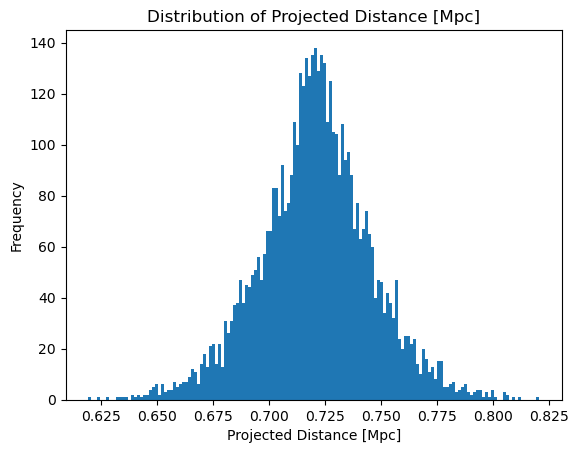

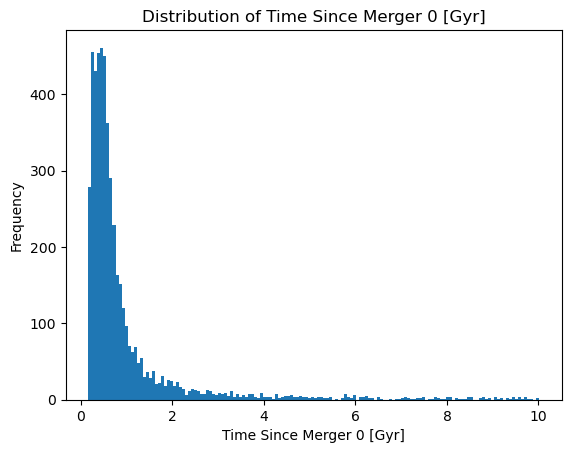

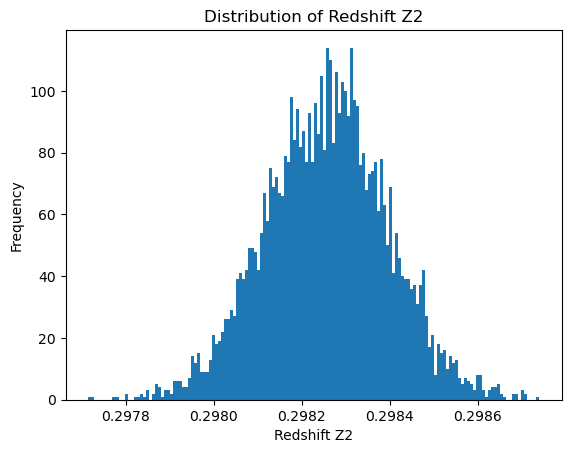

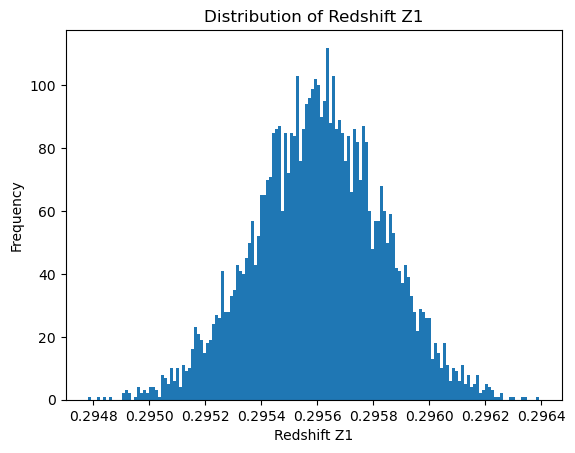

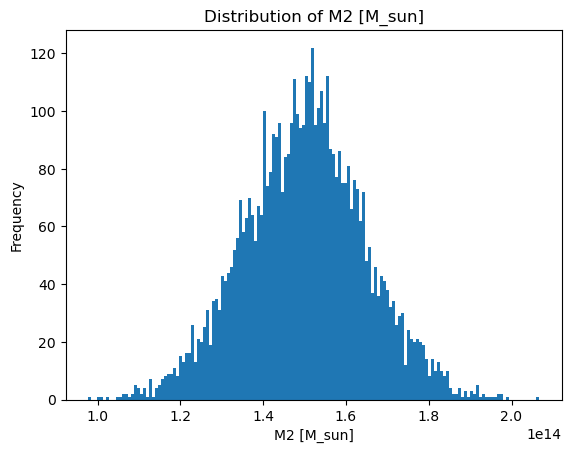

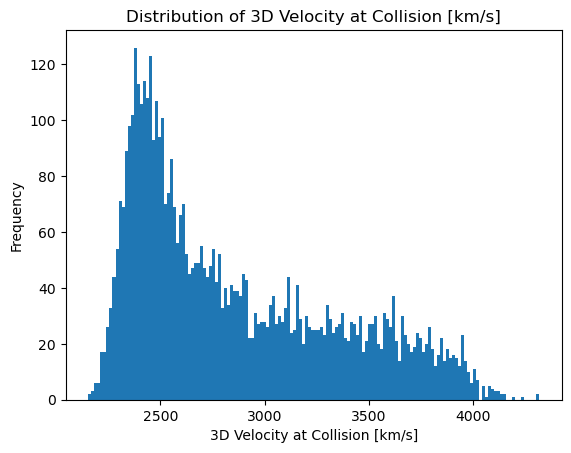

In [1]:
import pickle
import matplotlib.pyplot as plt
import glob

# Specify the prefix for the output files
prefix = "simulation_output"

# List all output files
output_files = glob.glob(f"BulletCluster/{prefix}_*.pickle")

# Mapping of filenames to labels
label_mapping = {
    '_m_1.pickle': 'M1 [M_sun]',
    '_m_2.pickle': 'M2 [M_sun]',
    '_z_1.pickle': 'Redshift Z1',
    '_z_2.pickle': 'Redshift Z2',
    '_d_proj.pickle': 'Projected Distance [Mpc]',
    '_v_rad_obs.pickle': 'Radial Velocity [km/s]',
    '_alpha.pickle': 'Merger Axis Angle [degrees]',
    '_v_3d_obs.pickle': '3D Velocity at Observation [km/s]',
    '_d_3d.pickle': '3D Distance [Mpc]',
    '_v_3d_col.pickle': '3D Velocity at Collision [km/s]',
    '_d_max.pickle': 'Maximum 3D Distance [Mpc]',
    '_TSM_0.pickle': 'Time Since Merger 0 [Gyr]',
    '_TSM_1.pickle': 'Time Since Merger 1 [Gyr]',
    '_T.pickle': 'Period [Gyr]',
    '_prob.pickle': 'Probability'
}

# Display the content of each file
print(output_files)
for file in output_files:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        # Get the label from the filename
        for suffix, label in label_mapping.items():
            if file.endswith(suffix):
                plt.hist(data, bins=150)
                plt.xlabel(label)
                plt.ylabel('Frequency')
                plt.title(f'Distribution of {label}')
                plt.show()
                break


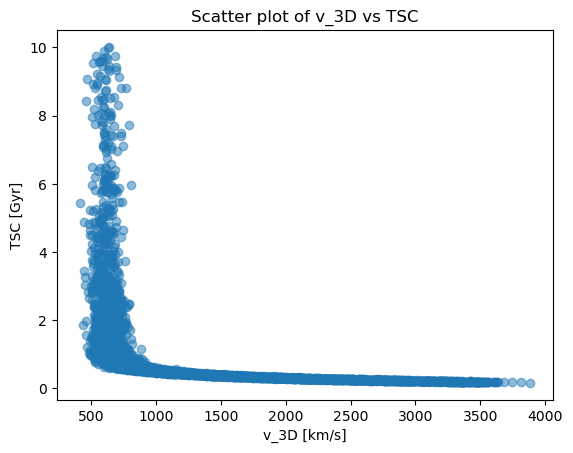

In [5]:
import pickle
import matplotlib.pyplot as plt

# 出力ファイルのプレフィックスを指定
prefix = "BulletCluster/simulation_output"

# 必要なファイルを読み込む
with open(prefix + '_v_3d_obs.pickle', 'rb') as f:
    v_3d_obs = pickle.load(f)

with open(prefix + '_TSM_0.pickle', 'rb') as f:
    TSM_0 = pickle.load(f)

# 散布図の作成
plt.scatter(v_3d_obs, TSM_0, alpha=0.5)
plt.xlabel('v_3D [km/s]')
plt.ylabel('TSC [Gyr]')
plt.title('Scatter plot of v_3D vs TSC')
plt.show()
